<a href="https://colab.research.google.com/github/mahdimalverdi/DM-Project3/blob/main/DM_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
!wget https://raw.githubusercontent.com/mahdimalverdi/DM-Project3/main/Stars.csv

--2021-07-04 05:46:29--  https://raw.githubusercontent.com/mahdimalverdi/DM-Project3/main/Stars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8181 (8.0K) [text/plain]
Saving to: ‘Stars.csv’

Stars.csv           100%[===================>]   7.99K  --.-KB/s    in 0s      

2021-07-04 05:46:29 (95.8 MB/s) - ‘Stars.csv’ saved [8181/8181]



In [346]:
stars = pd.read_csv('Stars.csv')

In [347]:
colors = {}
counter = 0
for color in stars['Color'].unique():
  counter += 1
  colors[color] = counter

stars['color_number'] = stars.apply(lambda x: colors[x['Color']], axis =1)

colors
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color_number
0,3068,0.002400,0.1700,16.12,Red,M,0,1
1,3042,0.000500,0.1542,16.60,Red,M,0,1
2,2600,0.000300,0.1020,18.70,Red,M,0,1
3,2800,0.000200,0.1600,16.65,Red,M,0,1
4,1939,0.000138,0.1030,20.06,Red,M,0,1
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,7
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,7
237,8829,537493.000000,1423.0000,-10.73,White,A,5,3
238,9235,404940.000000,1112.0000,-11.23,White,A,5,3


In [348]:
spectral_classes = {}
counter = 0
for spectral_class in stars['Spectral_Class'].unique():
  counter += 1
  spectral_classes[spectral_class] = counter

spectral_classes
stars['spectral_classes_number'] = stars.apply(lambda x: spectral_classes[x['Spectral_Class']], axis =1)
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color_number,spectral_classes_number
0,3068,0.002400,0.1700,16.12,Red,M,0,1,1
1,3042,0.000500,0.1542,16.60,Red,M,0,1,1
2,2600,0.000300,0.1020,18.70,Red,M,0,1,1
3,2800,0.000200,0.1600,16.65,Red,M,0,1,1
4,1939,0.000138,0.1030,20.06,Red,M,0,1,1
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,7,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,7,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5,3,3
238,9235,404940.000000,1112.0000,-11.23,White,A,5,3,3


In [349]:
stars['Log_R'] = np.log(stars['R'])
stars['Log_L'] = np.log(stars['L'])
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type,color_number,spectral_classes_number,Log_R,Log_L
0,3068,0.002400,0.1700,16.12,Red,M,0,1,1,-1.771957,-6.032287
1,3042,0.000500,0.1542,16.60,Red,M,0,1,1,-1.869505,-7.600902
2,2600,0.000300,0.1020,18.70,Red,M,0,1,1,-2.282782,-8.111728
3,2800,0.000200,0.1600,16.65,Red,M,0,1,1,-1.832581,-8.517193
4,1939,0.000138,0.1030,20.06,Red,M,0,1,1,-2.273026,-8.888257
...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,7,5,7.212294,12.834228
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,7,5,7.085064,13.634039
237,8829,537493.000000,1423.0000,-10.73,White,A,5,3,3,7.260523,13.194671
238,9235,404940.000000,1112.0000,-11.23,White,A,5,3,3,7.013915,12.911494


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


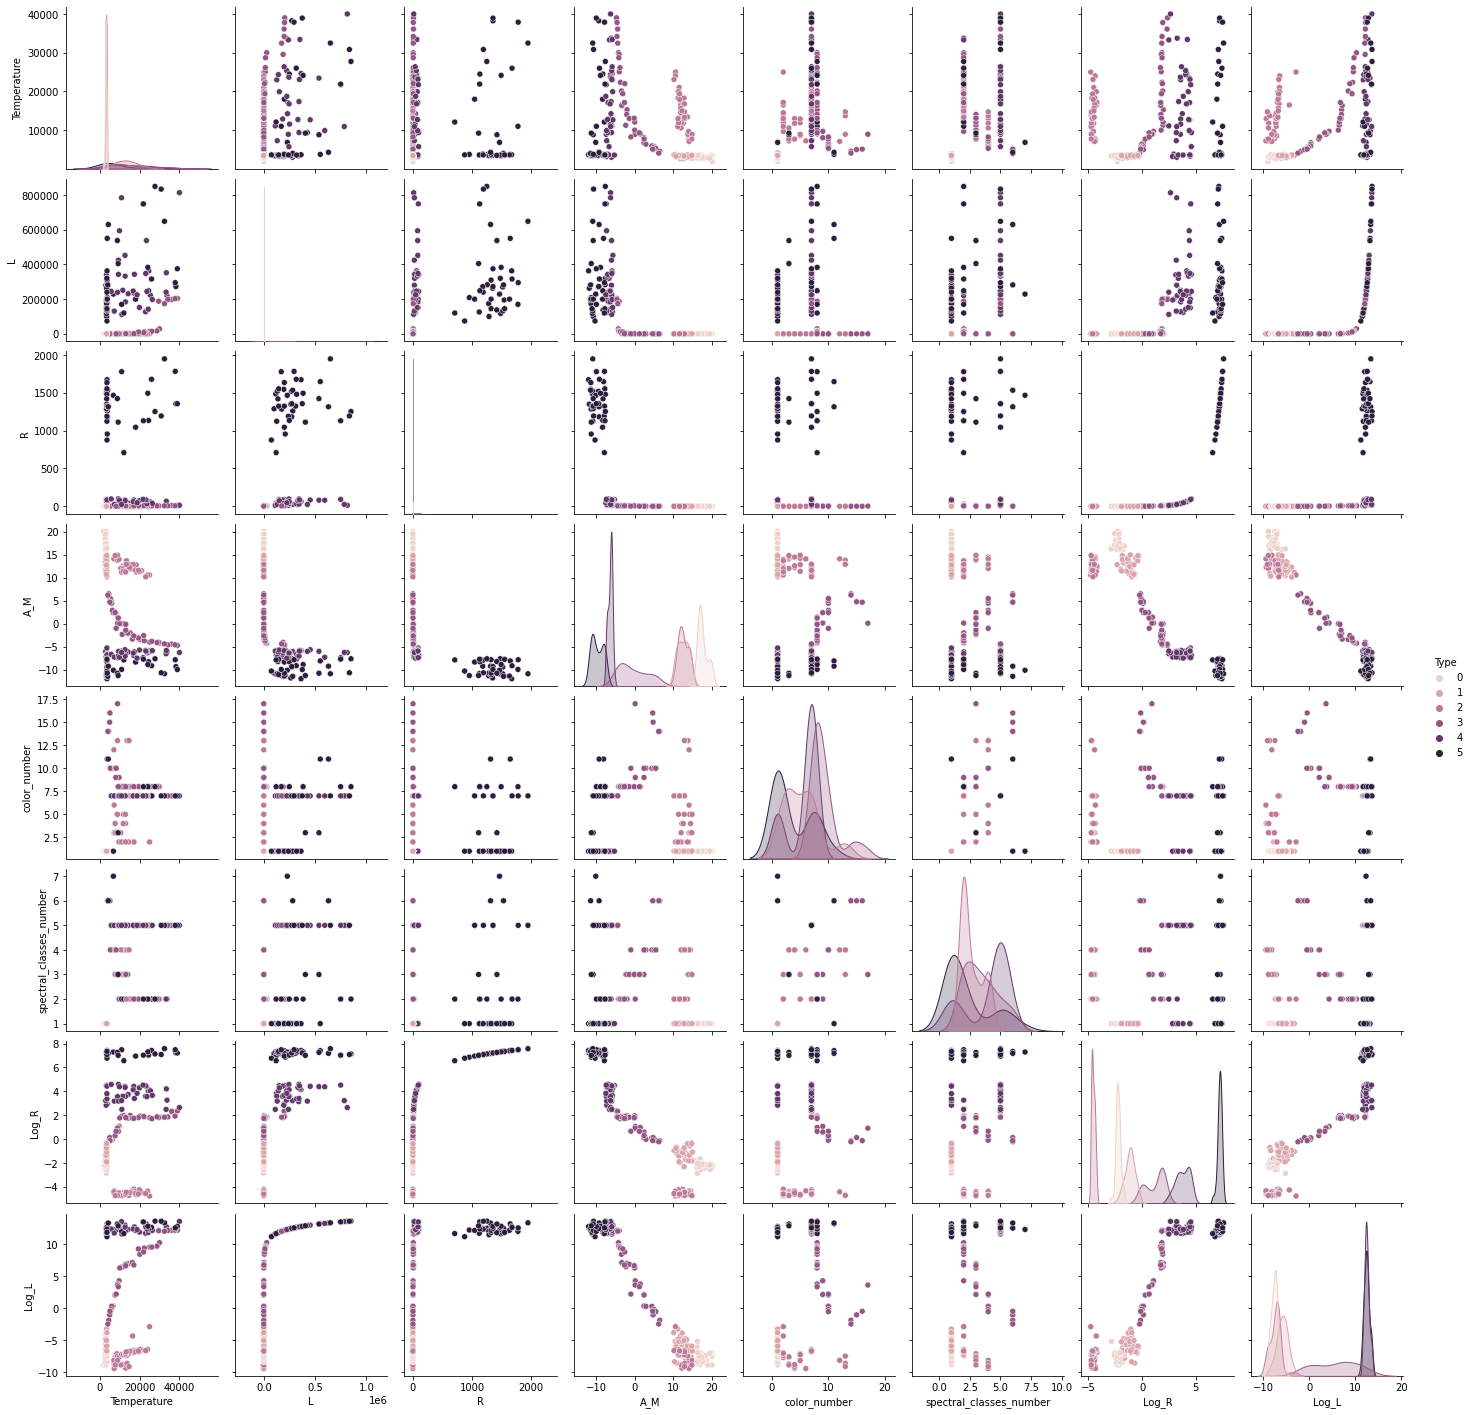

In [335]:
sb.pairplot(stars, hue="Type", vars=['Temperature', 'L', 'R', 'A_M', 'color_number', 'spectral_classes_number', 'Log_R', 'Log_L'])

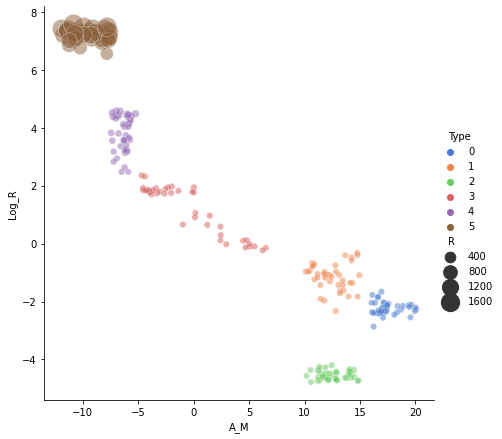

In [354]:

sb.relplot(x="A_M", y="Log_R", hue="Type", size="R", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=stars)

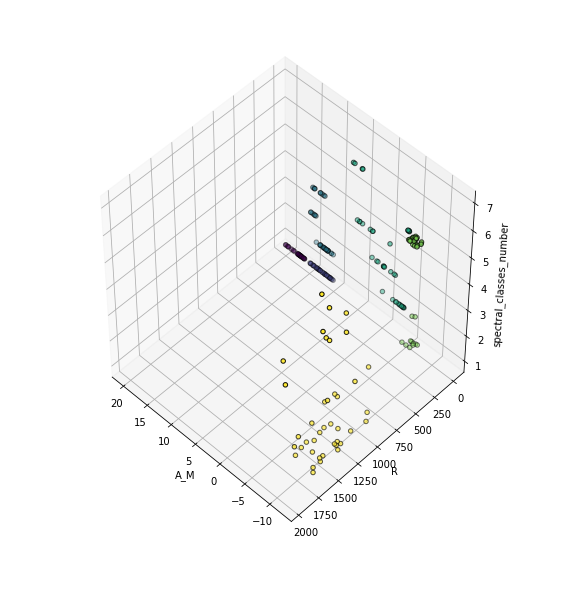

In [72]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure(1, figsize=(8,8))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
sequence_containing_x_vals = stars['A_M'].values
sequence_containing_y_vals = stars['R'].values
sequence_containing_z_vals = stars['spectral_classes_number'].values
sequence_containing_c_vals = stars['Type'].values

ax.set_xlabel('A_M')
ax.set_ylabel('R')
ax.set_zlabel('spectral_classes_number')

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=sequence_containing_c_vals, edgecolor='k')
ax.dist = 12

pyplot.show()

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [188]:

dataset

,Temperature,R,A_M
0,3068,0.1700,16.12
1,3042,0.1542,16.60
2,2600,0.1020,18.70
3,2800,0.1600,16.65
4,1939,0.1030,20.06
...,...,...,...
235,38940,1356.0000,-9.93
236,30839,1194.0000,-10.63
237,8829,1423.0000,-10.73
238,9235,1112.0000,-11.23


In [313]:
def get_percent():
  pred = stars.groupby(by=['Type']).apply(lambda x: x['pred'].mode())[0].to_dict()
  print(pred)
  stars['ans'] = stars.apply(lambda x: 1 if x['pred'] == pred[x['Type']] else 0, axis =1 )
  return stars['ans'].sum() / stars['ans'].count()

{0: 0}


KeyError: ignored

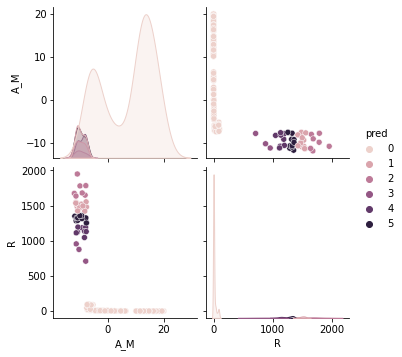

In [345]:
kmeans = KMeans(n_clusters=6, max_iter=30000, n_init=1000, init='random')
dataset = stars[['R','A_M']]
kmeans.fit(dataset)
pred = kmeans.predict(dataset) 
stars['pred']=pred
sb.pairplot(stars, hue="pred", vars=['A_M', 'R'])
get_percent()

{0: 3, 1: 1, 2: 2, 3: 4, 4: 0, 5: 5}


0.9208333333333333

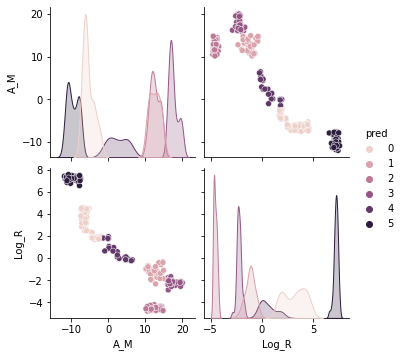

In [341]:
kmeans = KMeans(n_clusters=6, max_iter=30000, n_init=1000, init='random')
dataset = stars[['Log_R','A_M']]
kmeans.fit(dataset)
pred = kmeans.predict(dataset) 
stars['pred']=pred
sb.pairplot(stars, hue="pred", vars=['A_M', 'Log_R'])
get_percent()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 1}


0.9125

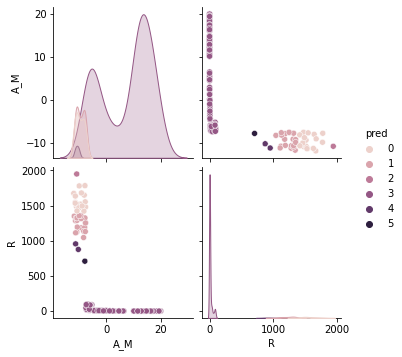

In [340]:
from sklearn.cluster import AgglomerativeClustering
dataset = stars[['R','A_M']]
clustering = AgglomerativeClustering( n_clusters=6, linkage='average')
clustering.fit(dataset)
stars['pred']=clustering.labels_
sb.pairplot(stars, hue="pred", vars=['A_M', 'R'])
get_percent()

{0: 4, 1: 0, 2: 0, 3: 1, 4: 1, 5: 3}


0.9166666666666666

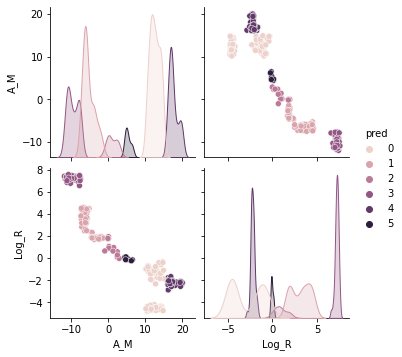

In [318]:
from sklearn.cluster import AgglomerativeClustering
dataset = stars[['Log_R','A_M']]
clustering = AgglomerativeClustering( n_clusters=6, linkage='average')
clustering.fit(dataset)
stars['pred']=clustering.labels_
sb.pairplot(stars, hue="pred", vars=['A_M', 'Log_R'])
get_percent()

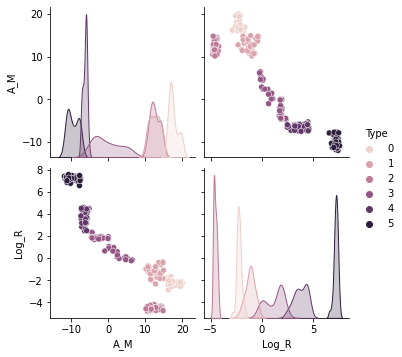

In [276]:
sb.pairplot(stars, hue="Type", vars=['A_M', 'Log_R'])

{0: 0, 1: 1, 2: 2, 3: 3, 4: 7, 5: 8}


0.9166666666666666

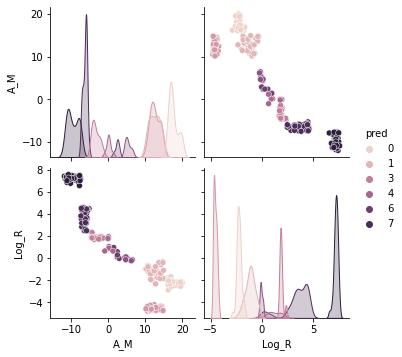

In [326]:
from sklearn.cluster import DBSCAN
dataset = stars[['Log_R','A_M']]
clustering =  DBSCAN(eps=1.2, min_samples=6,)
clustering.fit(dataset)
stars['pred']=clustering.labels_
sb.pairplot(stars, hue="pred", vars=['A_M', 'Log_R'])
get_percent()

{0: 0, 1: -1, 2: 1, 3: -1, 4: -1, 5: -1}


0.8208333333333333

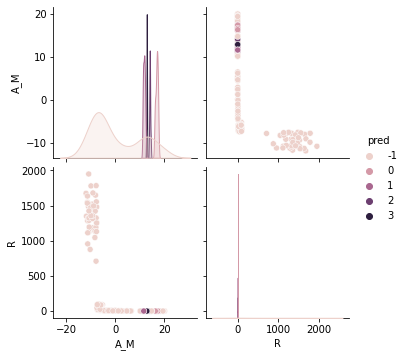

In [333]:
from sklearn.cluster import DBSCAN
dataset = stars[['R','A_M']]
clustering =  DBSCAN(eps=.25, min_samples=6,)
clustering.fit(dataset)
stars['pred']=clustering.labels_
sb.pairplot(stars, hue="pred", vars=['A_M', 'R'])
get_percent()